# Análisis exploratorio de datos

Contentesta las siguientes preguntas escribiendo el código de Python necesario para encontrar las respuestas o producir las gráficas necesarias

---


In [1]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# No mostrar advertencias
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### 1. ¿Cuál es la distribución de edades de los clientes?
- **Objetivo**: Comprender la distribución de las edades en el conjunto de datos.
- **Respuesta esperada**: Un histograma de la columna Age.

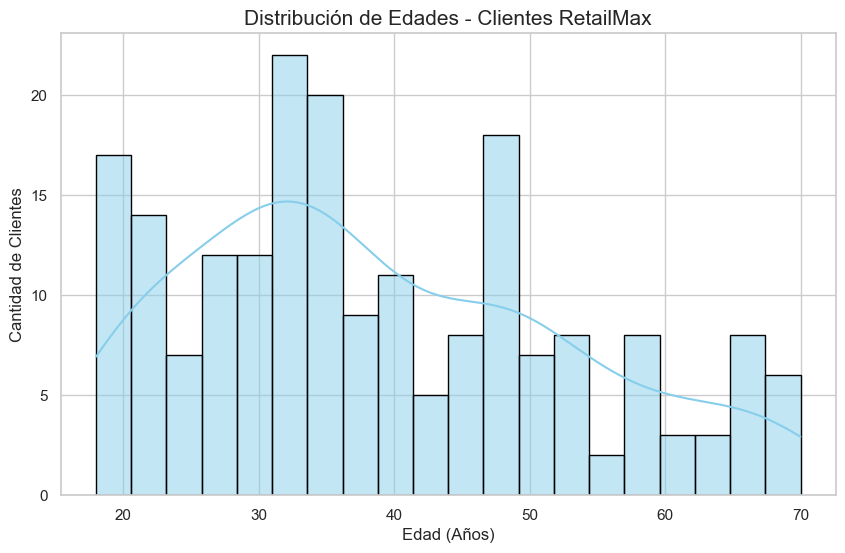

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar los datos (Asegúrate de que el archivo esté en la misma carpeta)
df = pd.read_csv('retailmax.csv') 

# 2. Configuración estética
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# 3. Creación del histograma basado en la columna 'Age'
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue', edgecolor='black')

# 4. Personalización de la gráfica
plt.title('Distribución de Edades - Clientes RetailMax', fontsize=15)
plt.xlabel('Edad (Años)', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)

plt.show()

### 2. ¿Existen diferencias significativas en los ingresos anuales entre hombres y mujeres?
- **Objetivo**: Comparar la distribución de ingresos anuales entre géneros.
- **Respuesta esperada**: Una gráfica de cajas (boxplot) que muestre la distribución de Annual Income (k$) por género.

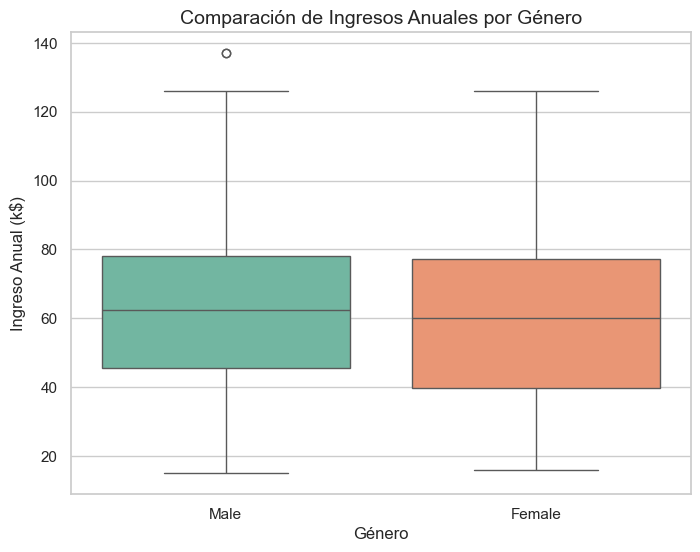

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear el boxplot comparando 'Annual Income (k$)' por 'Gender'
# Usamos los nombres exactos de las columnas detectadas en tu archivo
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df, palette='Set2')

# Personalización de la gráfica
plt.title('Comparación de Ingresos Anuales por Género', fontsize=14)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Ingreso Anual (k$)', fontsize=12)

plt.show()

### 3. ¿Cómo se distribuye la puntuación de gasto (Spending Score) entre los diferentes rangos de edad?
- **Objetivo**: Analizar la relación entre la edad y la puntuación de gasto.
- **Respuesta esperada**: Una gráfica de dispersión (scatter plot) o un gráfico de cajas que compare la Spending Score (1-100) con diferentes grupos de edad.

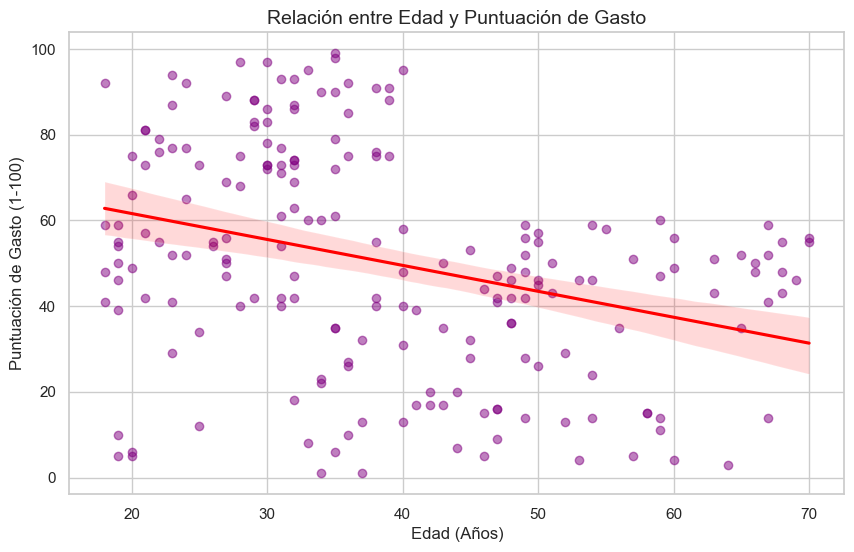

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el gráfico de dispersión con línea de regresión
# Usamos las columnas exactas del archivo: 'Age' y 'Spending Score (1-100)'
sns.regplot(x='Age', y='Spending Score (1-100)', data=df, 
            scatter_kws={'alpha':0.5, 'color':'purple'}, 
            line_kws={'color':'red'})

# Personalización de etiquetas
plt.title('Relación entre Edad y Puntuación de Gasto', fontsize=14)
plt.xlabel('Edad (Años)', fontsize=12)
plt.ylabel('Puntuación de Gasto (1-100)', fontsize=12)

plt.show()

4. ¿Cuál es la correlación entre el ingreso anual y la puntuación de gasto?
- **Objetivo**: Identificar si existe una relación lineal entre el ingreso y el gasto.
- **Respuesta esperada**: Una gráfica de dispersión y el cálculo del coeficiente de correlación entre Annual Income (k$) y Spending Score (1-100).

El coeficiente de correlación de Pearson es: 0.01


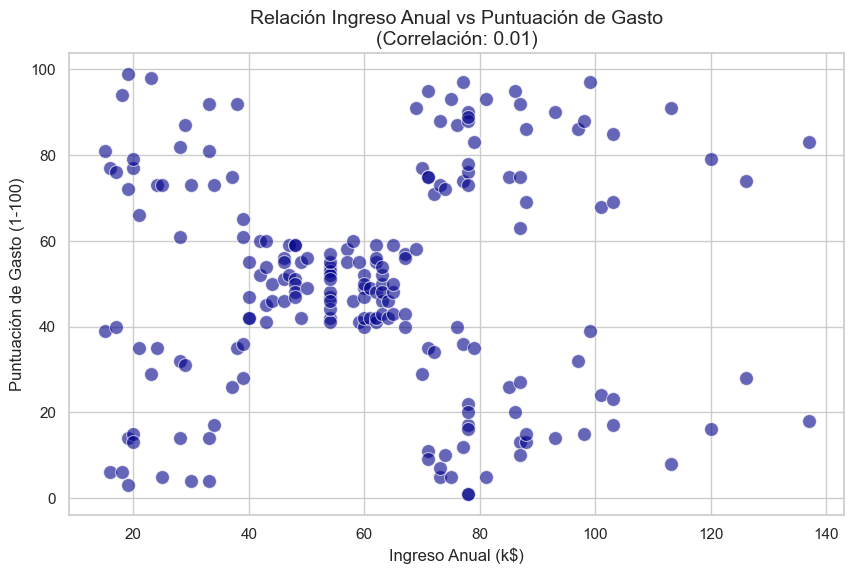

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calcular el coeficiente de correlación numérica
# Usamos las columnas exactas: 'Annual Income (k$)' y 'Spending Score (1-100)'
correlation = df['Annual Income (k$)'].corr(df['Spending Score (1-100)'])
print(f"El coeficiente de correlación de Pearson es: {correlation:.2f}")

# 2. Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
                data=df, s=100, color='darkblue', alpha=0.6)

# 3. Personalización
plt.title(f'Relación Ingreso Anual vs Puntuación de Gasto\n(Correlación: {correlation:.2f})', fontsize=14)
plt.xlabel('Ingreso Anual (k$)', fontsize=12)
plt.ylabel('Puntuación de Gasto (1-100)', fontsize=12)

plt.show()

### 5. ¿Cómo varía la puntuación de gasto en diferentes grupos de ingresos anuales?
- **Objetivo**: Examinar cómo los clientes en diferentes rangos de ingresos se comportan en términos de gasto.
- **Respuesta esperada**: Una gráfica de cajas o de violín que muestre la Spending Score (1-100) para diferentes rangos de Annual Income (k$).

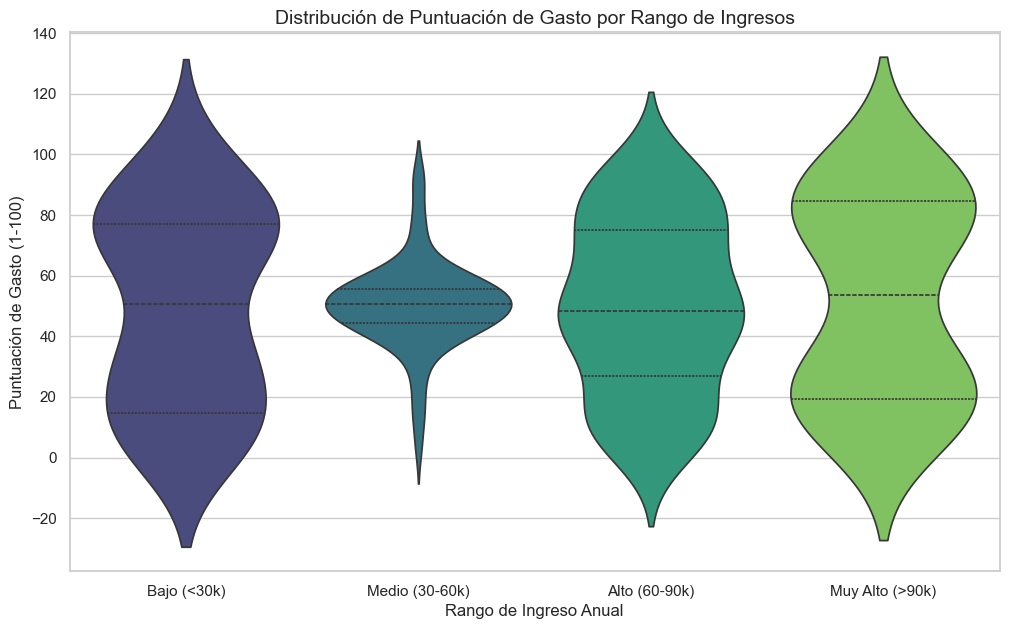

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Crear rangos de ingresos (bins) para facilitar el análisis
# Los datos de tu archivo muestran ingresos desde 15k hasta cerca de 140k
df['Income_Range'] = pd.cut(df['Annual Income (k$)'], 
                           bins=[0, 30, 60, 90, 145], 
                           labels=['Bajo (<30k)', 'Medio (30-60k)', 'Alto (60-90k)', 'Muy Alto (>90k)'])

# 2. Configurar la visualización
plt.figure(figsize=(12, 7))

# 3. Crear el gráfico de violín
sns.violinplot(x='Income_Range', y='Spending Score (1-100)', data=df, 
               palette='viridis', inner='quartile')

# 4. Personalización
plt.title('Distribución de Puntuación de Gasto por Rango de Ingresos', fontsize=14)
plt.xlabel('Rango de Ingreso Anual', fontsize=12)
plt.ylabel('Puntuación de Gasto (1-100)', fontsize=12)

plt.show()

### 6. ¿Cuál es la proporción de clientes por género?
- **Objetivo**: Determinar el balance de género en el conjunto de datos.
- **Respuesta esperada**: Una gráfica de barras o un gráfico de pastel que muestre la proporción de hombres y mujeres.

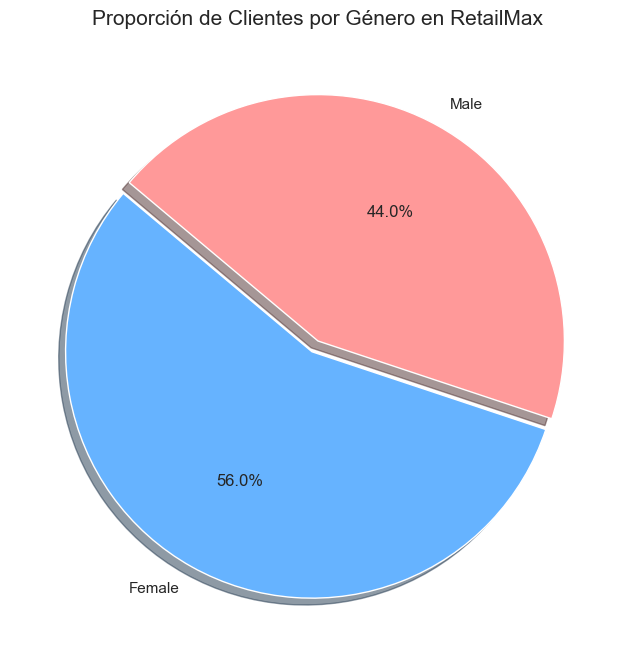

In [13]:
import matplotlib.pyplot as plt

# 1. Contar los géneros
gender_counts = df['Gender'].value_counts()

# 2. Configurar el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, 
        labels=gender_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#66b3ff', '#ff9999'], 
        explode=(0.05, 0),
        shadow=True)

plt.title('Proporción de Clientes por Género en RetailMax', fontsize=15)
plt.show()

### 7. ¿Qué grupos de edad gastan más en promedio?
- **Objetivo**: Identificar los grupos de edad que tienen una mayor puntuación de gasto en promedio.
- **Respuesta esperada**: Una gráfica de barras que compare la puntuación de gasto promedio entre diferentes grupos de edad.

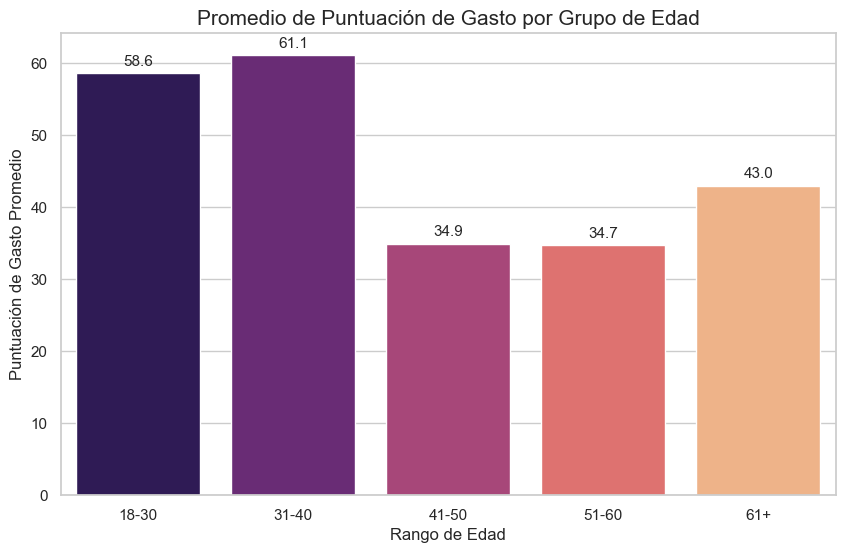

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Crear grupos de edad por décadas
# Definimos los cortes: 18-30, 31-40, 41-50, 51-60, 61+
bins = [18, 30, 40, 50, 60, 75]
labels = ['18-30', '31-40', '41-50', '51-60', '61+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# 2. Calcular el promedio de gasto por cada grupo
gasto_promedio = df.groupby('Age_Group')['Spending Score (1-100)'].mean().reset_index()

# 3. Crear la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Spending Score (1-100)', data=gasto_promedio, palette='magma')

# 4. Personalización
plt.title('Promedio de Puntuación de Gasto por Grupo de Edad', fontsize=15)
plt.xlabel('Rango de Edad', fontsize=12)
plt.ylabel('Puntuación de Gasto Promedio', fontsize=12)

# Añadir etiquetas de valor sobre las barras para mayor claridad
for i, valor in enumerate(gasto_promedio['Spending Score (1-100)']):
    plt.text(i, valor + 1, f'{valor:.1f}', ha='center', fontsize=11)

plt.show()

### 8. ¿Hay alguna relación entre la edad y el ingreso anual de los clientes?
- **Objetivo**: Explorar si hay una tendencia entre la edad de los clientes y sus ingresos.
- **Respuesta esperada**: Una gráfica de dispersión que muestre la relación entre Age y Annual Income (k$).

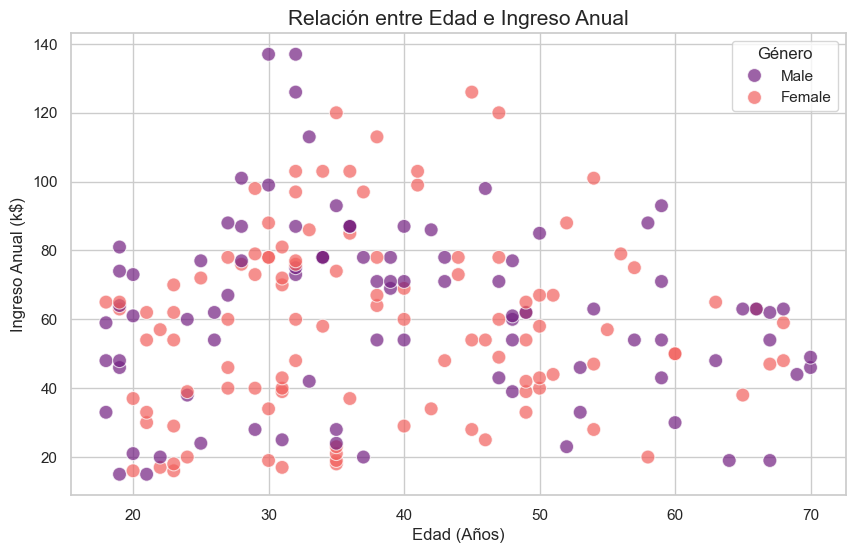

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que df esté cargado previamente
plt.figure(figsize=(10, 6))

# Crear el gráfico de dispersión
sns.scatterplot(x='Age', y='Annual Income (k$)', 
                data=df, 
                hue='Gender', 
                s=100, 
                alpha=0.7, 
                palette='magma')

# Personalización
plt.title('Relación entre Edad e Ingreso Anual', fontsize=15)
plt.xlabel('Edad (Años)', fontsize=12)
plt.ylabel('Ingreso Anual (k$)', fontsize=12)
plt.legend(title='Género')

plt.show()


### 9. ¿Cuál es la distribución conjunta de la edad y el ingreso anual?
- **Objetivo**: Entender cómo se distribuyen estas dos variables en conjunto.
- **Respuesta esperada**: Una gráfica de dispersión con una densidad de puntos o un gráfico de hexágonos que muestre la distribución conjunta de Age y Annual Income (k$).

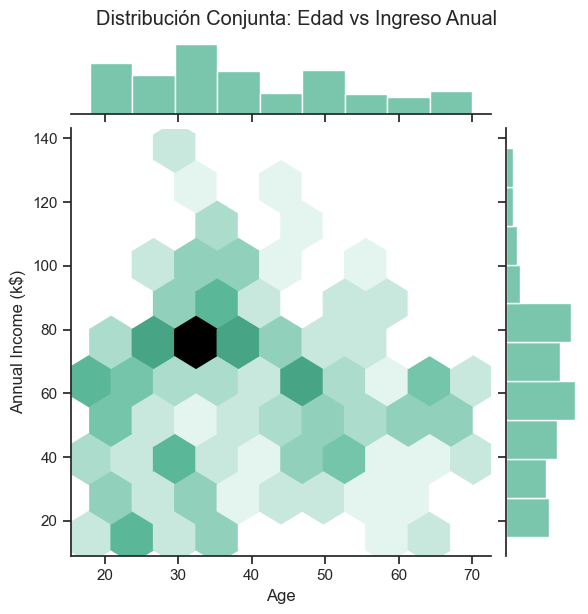

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pregunta 9: Distribución conjunta
# Usamos un estilo más directo para evitar el SyntaxError
sns.set_theme(style="ticks")

g = sns.jointplot(x='Age', y='Annual Income (k$)', data=df, kind='hex', color='#4CB391')
g.fig.suptitle('Distribución Conjunta: Edad vs Ingreso Anual', y=1.02)

plt.show()

### 10. ¿Cómo se distribuyen los clientes en función de la puntuación de gasto y el género?
- **Objetivo**: Analizar la relación entre la puntuación de gasto y el género.
- **Respuesta esperada**: Una gráfica de dispersión o un gráfico de violín que muestre la Spending Score (1-100) separada por género.

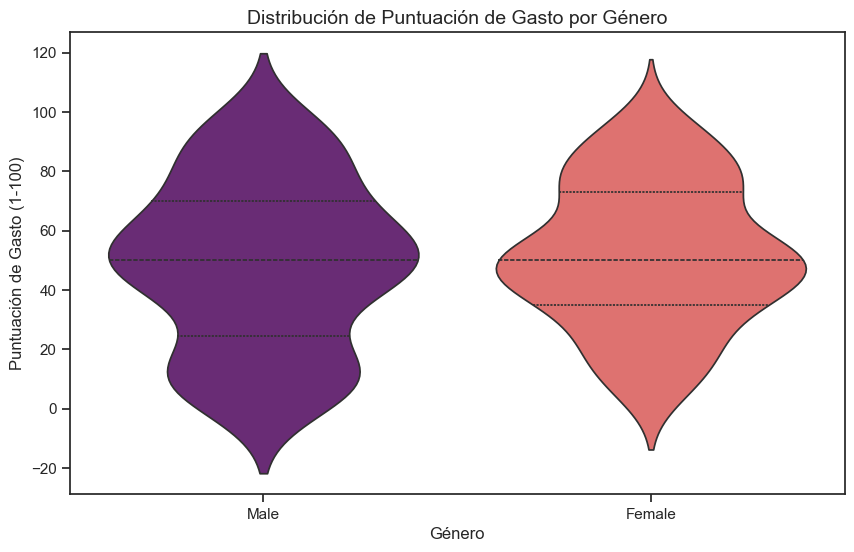

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pregunta 10: Puntuación de gasto por género
plt.figure(figsize=(10, 6))

# Creamos el gráfico de violín
sns.violinplot(x='Gender', y='Spending Score (1-100)', data=df, palette='magma', inner='quartile')

# Añadimos títulos claros
plt.title('Distribución de Puntuación de Gasto por Género', fontsize=14)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Puntuación de Gasto (1-100)', fontsize=12)

plt.show()